# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

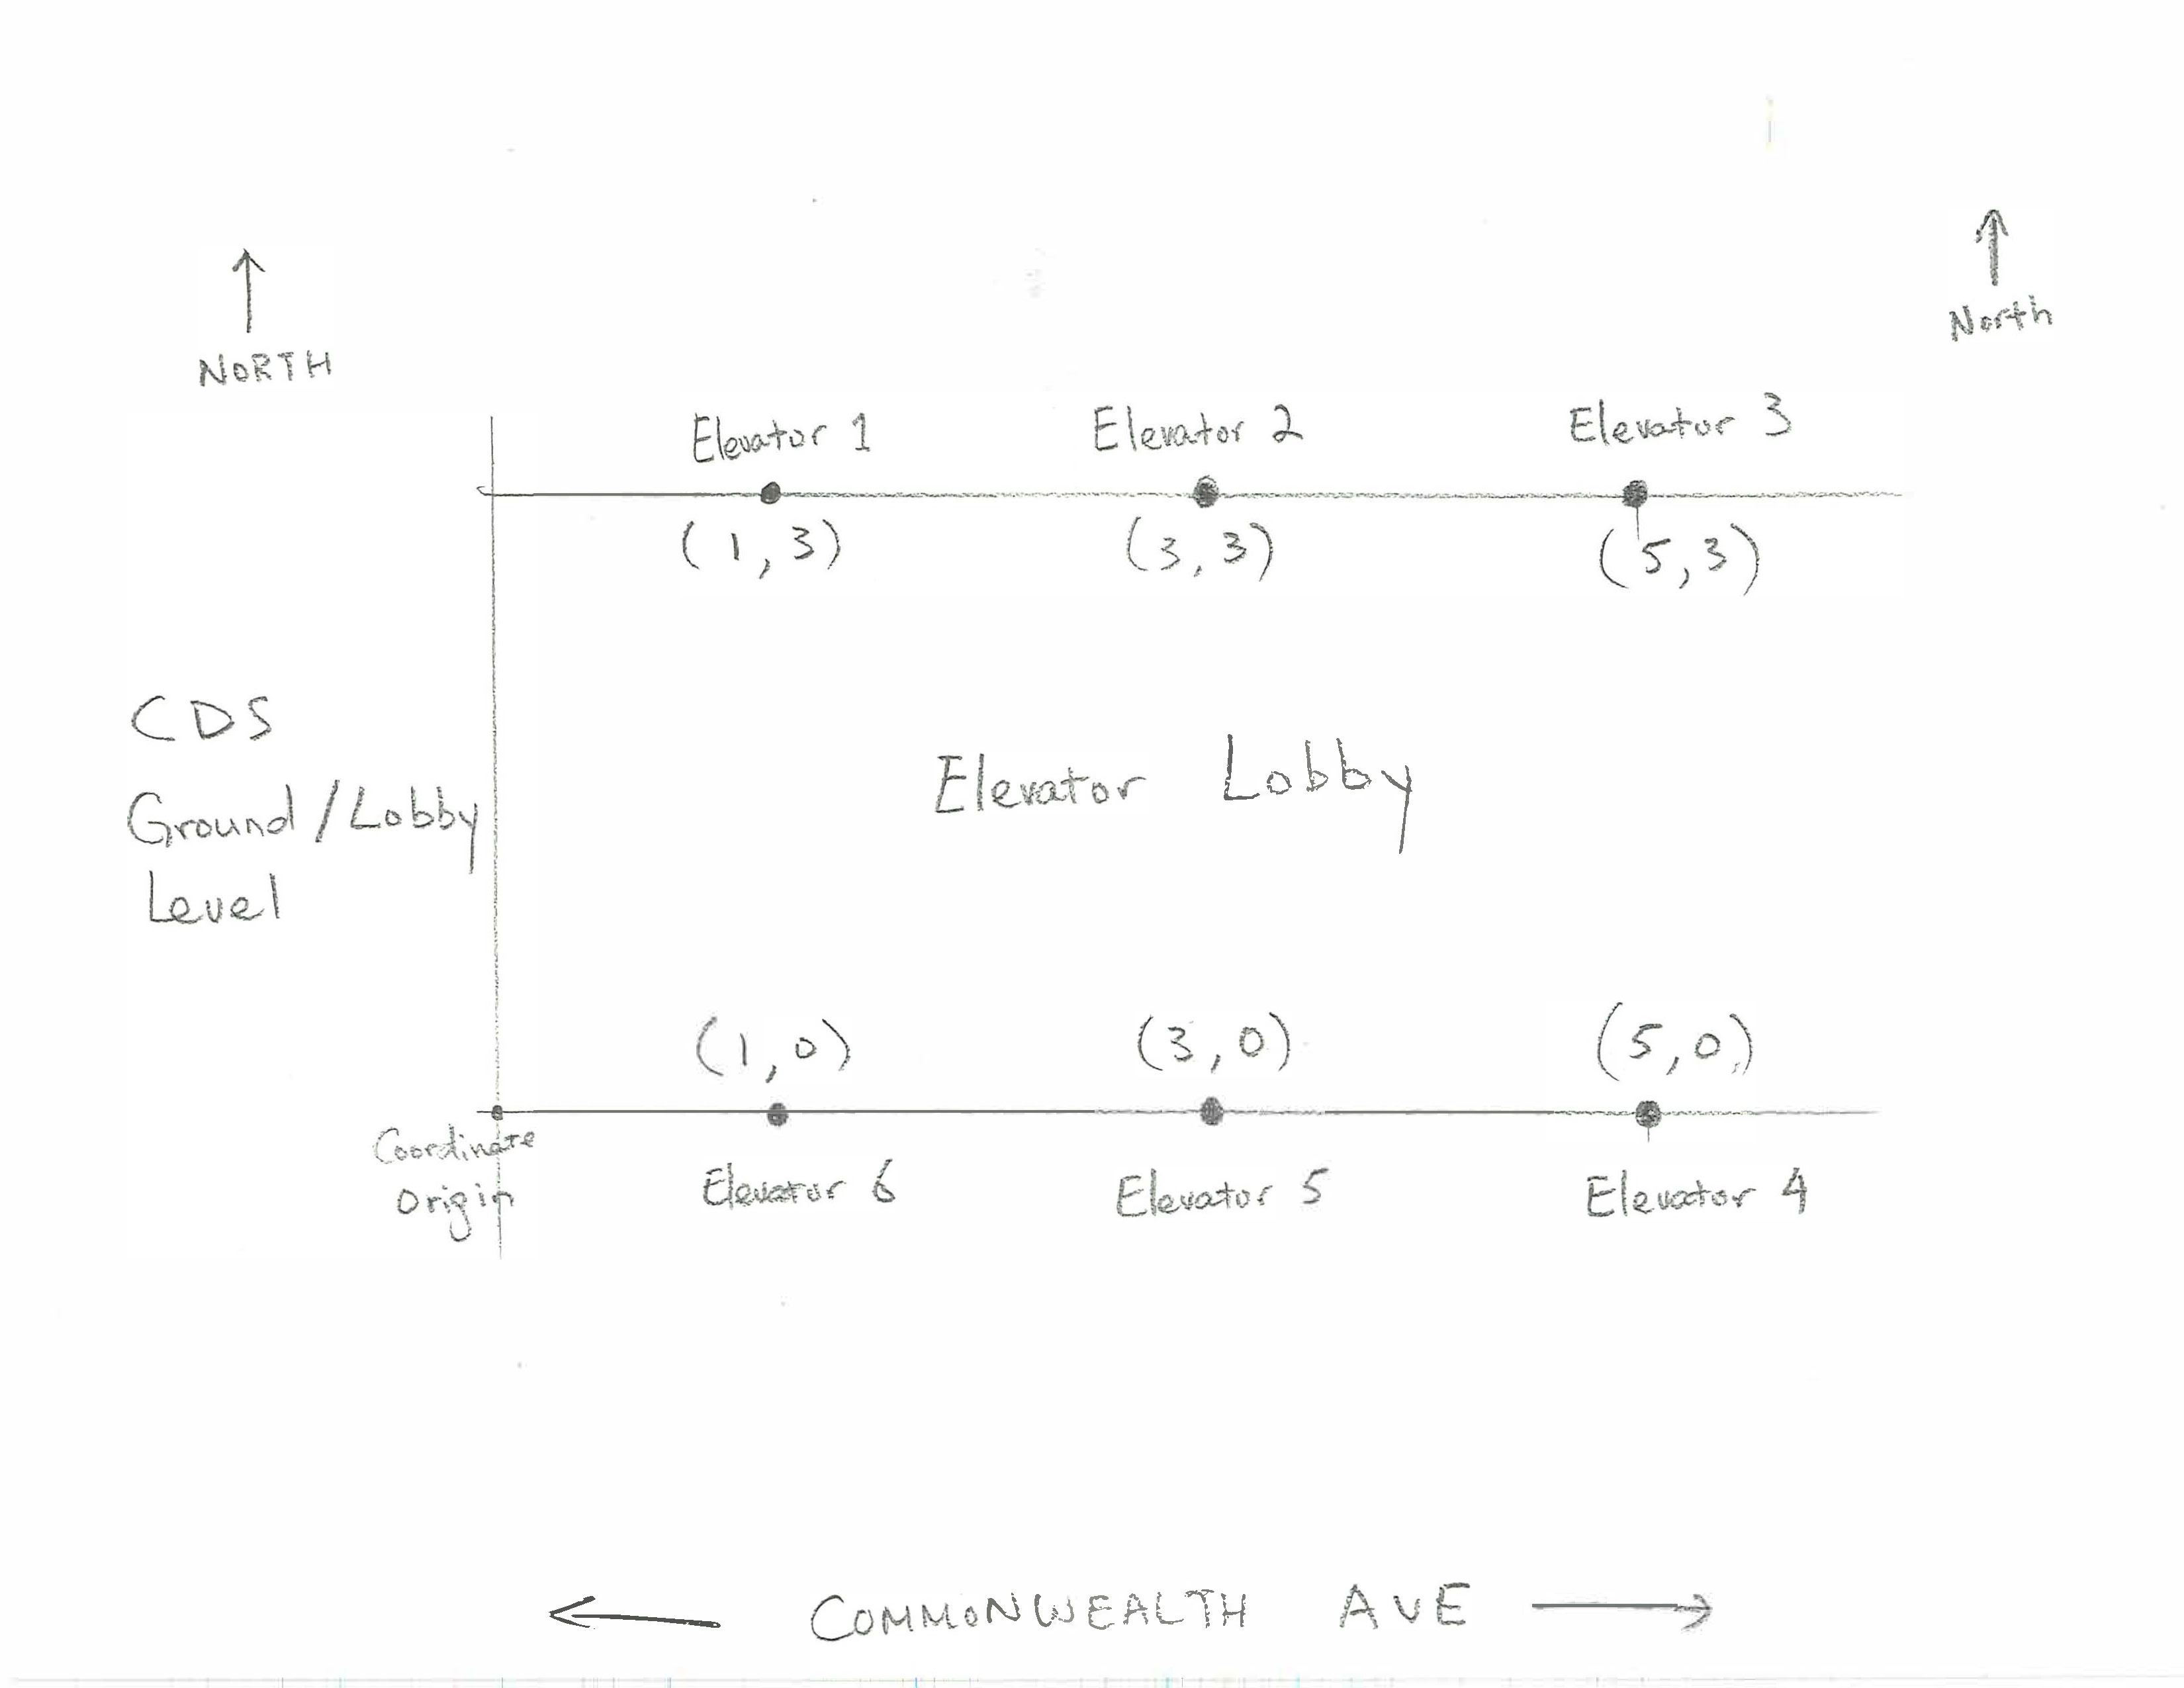

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:** According to the diagram, I'd stand between elevator 2 and 5 (aka (3, 1.5)) to maximize my field of view to all 6 elevators and minimizing my walking distance to 2 and 5 while keeping a contant and equal distance to all 4 other elevators.

**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

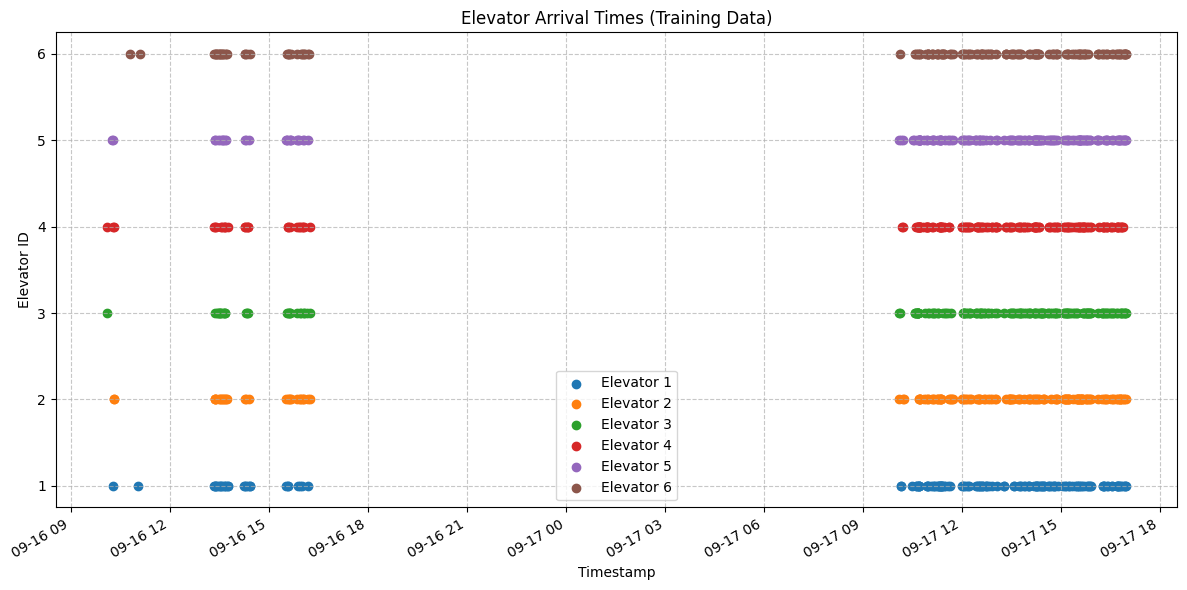

In [156]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import time, datetime, timedelta
import numpy as np

def make_plot():
    df = pd.read_csv('data/training.csv')
    
    # Convert timestamp to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Filter data for time between 10 AM and 5 PM
    df_filtered = df[(df['Timestamp'].dt.time >= time(10, 0)) & (df['Timestamp'].dt.time <= time(17, 0))]
    
    # Create the scatter plot
    plt.figure(figsize=(12, 6))
    for elevator in range(1, 7):
        elevator_data = df_filtered[df_filtered['Elevator ID'] == elevator]
        plt.scatter(elevator_data['Timestamp'], elevator_data['Elevator ID'], label=f'Elevator {elevator}')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Elevator ID')
    plt.title('Elevator Arrival Times (Training Data)')
    plt.legend()
    plt.yticks(range(1, 7))
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Rotate x-axis labels for better readability
    plt.gcf().autofmt_xdate()
    
    plt.tight_layout()
    plt.show()

make_plot()



State observations here (briefly).

**Answer:**
The plot shows that there is a much less elevator arrivals on day September 16th, this could be due to lack of data contributors specifically between the 11:00AM time slot to around 1:00PM time slot. Other than that the scale makes it hard to tell the differences in elevator arrivals but we can observe that elevator 1, 3, and 4 has gaps on the 17th indicating that they didn't arrive as frequent as elevator 5 which is the most consistant elevator.

**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [157]:
def calculate_elevator_statistics(file_path):
    # Read the CSV file, Convert timestamp to datetime, Sort the dataframe by timestamp
    df = pd.read_csv(file_path)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df.sort_values('Timestamp')
    
    # Set the start time to 10 AM on the first day
    start_time = df['Timestamp'].min().replace(hour=10, minute=0, second=0, microsecond=0)
    end_time = df['Timestamp'].max()
    
    # Initialize dictionaries to store elevator data
    elevator_stats = {i: {'total_time': 0, 'arrivals': 0, 'freq': 0} for i in range(1, 7)}
    
    # Process data in 5-minute intervals
    current_time = start_time
    while current_time <= end_time:
        interval_end = current_time + timedelta(minutes=5)
        interval_data = df[(df['Timestamp'] >= current_time) & (df['Timestamp'] < interval_end)]
        
        if not interval_data.empty:
            for elevator in range(1, 7):
                elevator_stats[elevator]['total_time'] += 300  # 5 minutes = 300 seconds
                elevator_stats[elevator]['arrivals'] += interval_data[interval_data['Elevator ID'] == elevator].shape[0]
        
        current_time = interval_end
    
    # Calculate frequencies
    for elevator in elevator_stats:
        if elevator_stats[elevator]['total_time'] > 0:
            elevator_stats[elevator]['freq'] = elevator_stats[elevator]['arrivals'] / elevator_stats[elevator]['total_time']
    
    return elevator_stats

stats = calculate_elevator_statistics('data/training.csv')

# Create a formatted table
print("| ELEVATOR ID | TOTAL DATA COLLECTION TIME (s) | NUM of ARRIVALS | AVG FREQ (arrivals/s) |")
print("|-------------|--------------------------------|-----------------|-----------------------|")
for elevator, data in stats.items():
    print(f"| {elevator:11} | {data['total_time']:30,d} | {data['arrivals']:15d} | {data['freq']:21.6f} |")

| ELEVATOR ID | TOTAL DATA COLLECTION TIME (s) | NUM of ARRIVALS | AVG FREQ (arrivals/s) |
|-------------|--------------------------------|-----------------|-----------------------|
|           1 |                         29,400 |             155 |              0.005272 |
|           2 |                         29,400 |             162 |              0.005510 |
|           3 |                         29,400 |             170 |              0.005782 |
|           4 |                         29,400 |             167 |              0.005680 |
|           5 |                         29,400 |             167 |              0.005680 |
|           6 |                         29,400 |             159 |              0.005408 |


**Answer:** As the table below shows, the elevators on the east side arrives more times on average than the west side of CDS the middle elevators 2, 5 still has good arrival rates so staying in between elevators 2, 5 is not Optimal.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- | --- | --- | --- | --- | --- |
| Total data collection time (seconds) | 29,400 | 29,400 | 29,400 | 29,400 | 29,400 | 29,400 |
| Number of arrivals | 155 | 162 | 170 | 167 | 167 | 159 |
| Average frequency (arrivals per second) | 0.005272 | 0.005510 | 0.005782 | 0.005680 | 0.005680 | 0.005408 |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

In [158]:
def calculate_probabilities(elevator_stats):
    '''
    helper function to calculate the pr of arriavals for each elevator
    '''
    # Calculate sum of average frequencies
    sum_avg_frequencies = sum(elevator['freq'] for elevator in elevator_stats.values())
    
    # Calculate probabilities
    probabilities = {elevator: stats['freq'] / sum_avg_frequencies for elevator, stats in elevator_stats.items()}
    
    return probabilities

# Example usage
file_path = 'data/training.csv'
elevator_stats = calculate_elevator_statistics(file_path)
probabilities = calculate_probabilities(elevator_stats)

# Display the probabilities
probabilities_df = pd.DataFrame(list(probabilities.items()), columns=['Elevator ID', 'Probability of being next elevator to arrive'])
print(probabilities_df)

# Print the total of all probabilities
total_probability = probabilities_df['Probability of being next elevator to arrive'].sum()
print(f"Total Probability: {total_probability}")

   Elevator ID  Probability of being next elevator to arrive
0            1                                      0.158163
1            2                                      0.165306
2            3                                      0.173469
3            4                                      0.170408
4            5                                      0.170408
5            6                                      0.162245
Total Probability: 1.0


**Answer:** The probabilities are based on the average frequency of arrivals for each elevator. Elevators with higher average frequencies have a higher probability of being the next to arrive.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 0.158163 | 0.165306 | 0.173469 | 0.170408 | 0.170408 |0.162245 |

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


**Answer**

In [159]:
import pandas as pd
from IPython.display import display, Markdown

def optimize_waiting_location(data, coordinates):
    '''
    data is a dictionary containing the elevator IDs and their probabilities.
    coordinates is a dictionary containing the elevator IDs and their coordinates.
    '''
    # Create DataFrame
    df = pd.DataFrame(data)
    
    # Calculate the optimal waiting location
    x_optimal = sum(df.loc[i, 'Probability of being next elevator to arrive'] * coordinates[i+1][0] for i in range(len(df)))
    y_optimal = sum(df.loc[i, 'Probability of being next elevator to arrive'] * coordinates[i+1][1] for i in range(len(df)))
    
    return x_optimal, y_optimal

# Given data
data = {
    'Elevator ID': [1, 2, 3, 4, 5, 6],
    'Probability of being next elevator to arrive': [0.158519, 0.167901, 0.175309, 0.167901, 0.167901, 0.162469]
}

# Elevator coordinates
coordinates = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0)
}

# Optimize waiting location
x_opt, y_opt = optimize_waiting_location(data, coordinates)
print("New location:", (x_opt, y_opt))


New location: (3.044444, 1.505187)


### Optimal Waiting Location"
The optimal location to wait for an elevator is approximately at the coordinate (3.044444, 1.505187)
    
### Justification
This location is calculated as the weighted average of the coordinates of each elevator, with the weights being the probabilities of each elevator arriving next. By waiting at this location, you minimize the average distance to the next arriving elevator, thus optimizing your waiting time.

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [160]:
def euclidean_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

def get_average_walk_distance(data, coordinate):
    '''
    data is a csv file containing the data.
    coordinate is the coordinate to wait at.
    '''
    # Read the CSV file
    df = pd.read_csv(data)
    
    # Elevator coordinates
    coordinates = {
        1: (1, 3),
        2: (3, 3),
        3: (5, 3),
        4: (5, 0),
        5: (5, 0),
        6: (1, 0)
    }
    
    # Calculate the distance from the input coordinate to each elevator coordinate
    distances = []
    for index, row in df.iterrows():
        elevator_id = row['Elevator ID']
        elevator_coord = coordinates[elevator_id]
        distance = euclidean_distance(coordinate, elevator_coord)
        distances.append(distance)
    
    # Calculate the average distance
    average_walk_distance = np.mean(distances)
    
    return average_walk_distance

# Example usage
training_data = 'data/training.csv'
location_question_1 = (3, 1.5)  
location_question_5 = x_opt, y_opt

average_distance_q1 = get_average_walk_distance(training_data, location_question_1)
average_distance_q5 = get_average_walk_distance(training_data, location_question_5)

print(f"Average distance traveled if waiting at location from question 1: {average_distance_q1}")
print(f"Average distance traveled if waiting at location from question 5: {average_distance_q5}")

Average distance traveled if waiting at location from question 1: 2.3346938775510204
Average distance traveled if waiting at location from question 5: 2.327715092769739


**Answer:** Distances:
- Average distance traveled if waiting at location from question 1: 2.3346938775510204
- Average distance traveled if waiting at location from question 5: 2.327715092769739

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (Question 1) | (3, 1.5) |   (3.044444, 1.505187) |
|Smart position (Question 5) | (3.044444, 1.505187) |   (3.0408549999999996, 1.517508) |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:** Yes, I succeeded in finding a new waiting location which is slightly to the right of my original position

In [166]:
file_path = 'data/testing.csv'
stats = calculate_elevator_statistics(file_path)

data = {
    'Elevator ID': [1, 2, 3, 4, 5, 6],
    'Probability of being next elevator to arrive': [0.158560, 0.171206, 0.176070, 0.165370, 0.166342, 0.162451]
}

x_opt2, y_opt2 = optimize_waiting_location(data, coordinates)
print("New location:", (x_opt2, y_opt2))

location_question_1 = (3, 1.5) 
location_question_5_1 = x_opt, y_opt 
location_question_5 = x_opt2, y_opt2

average_distance_q1 = get_average_walk_distance(file_path, location_question_1)
average_distance_q5_1 = get_average_walk_distance(file_path, location_question_5_1)
average_distance_q5 = get_average_walk_distance(file_path, location_question_5)

print(f"Average distance traveled if waiting at location from question 1: {average_distance_q1}")
print(f"Average distance traveled if waiting at location from question 5_training_data: {average_distance_q5_1}")
print(f"Average distance traveled if waiting at location from question 5: {average_distance_q5}")

New location: (3.0408549999999996, 1.517508)
Average distance traveled if waiting at location from question 1: 2.3287937743190663
Average distance traveled if waiting at location from question 5_training_data: 2.322002568206044
Average distance traveled if waiting at location from question 5: 2.3216175435019855
